# Mätdata som en lista i skriptet

In [ ]:
from matplotlib import pyplot as plt
import scipy.optimize as opt
import numpy as np
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9]

Biblioteket `io` innehåller funktionen `StringIO` som vi behöver

In [ ]:
from io import StringIO

Det följande blocket innehåller mätdata som kunde komma från en automatisk mätutrustning. Den ena kolumnen innehåller spänningsvärden från en spänningskälla, den andra spänningsvärden från mätningen över ett motstånd i kretsen. 

`#` fungerar för att markera kommentarer som i Python-kod.

In [ ]:
leddatafile = StringIO(\
'''
# LED experiment med 330 ohm i serie med LED
#
# kolumn 1: hela spanningen [V]
# kolumn 2: spanningen over motstandet [V]
 0.1 4.334e-007
 0.2 1.436e-006
 0.3 3.755e-006
 0.4 9.119e-006
 0.5 2.153e-005
 0.6 5.022e-005
 0.7 0.0001165
 0.8 0.0002697
 0.9 0.0006224
 1.0 0.001430
 1.1 0.003259
 1.2 0.007288
 1.3 0.01570
 1.4 0.03177
 1.5 0.05865
 1.6 0.09774
 1.7 0.1481
 1.8 0.2078
 1.9 0.2744
 2.0 0.3466
 2.1 0.4230
 2.2 0.5024
 2.3 0.5844
 2.4 0.6684
 2.5 0.7540
 2.6 0.8410
 2.7 0.9291
 2.8 1.018
 2.9 1.108
 3.0 1.199
 3.1 1.290
 3.2 1.382
 3.3 1.474
 3.4 1.567
 3.5 1.660
 3.6 1.753
 3.7 1.847
 3.8 1.941
 3.9 2.035
 4.0 2.130
 4.1 2.225
 4.2 2.320
 4.3 2.415
 4.4 2.510
 4.5 2.606
 4.6 2.702
 4.7 2.797
 4.8 2.893
 4.9 2.990
 5.0 3.086
 5.1 3.182
 5.2 3.278
 5.3 3.375
 5.4 3.472
 5.5 3.568
 5.6 3.665
 5.7 3.762
 5.8 3.859
 5.9 3.956
 6.0 4.053
 6.1 4.150
 6.2 4.247
 6.3 4.345
 6.4 4.442
 6.5 4.540
 6.6 4.637
 6.7 4.734
 6.8 4.832
 6.9 4.930
 7.0 5.027
 7.1 5.125
 7.2 5.223
 7.3 5.320
 7.4 5.418
 7.5 5.516
 7.6 5.614
 7.7 5.712
 7.8 5.810
 7.9 5.908
 8.0 6.006
 8.1 6.104
 8.2 6.202
 8.3 6.300
 8.4 6.398
 8.5 6.497
 8.6 6.595
 8.7 6.693
 8.8 6.791
 8.9 6.889
 9.0 6.988
 9.1 7.086
 9.2 7.184
 9.3 7.283
 9.4 7.381
 9.5 7.480
 9.6 7.578
 9.7 7.676
 9.8 7.775
 9.9 7.873
 10.0 7.972
 10.1 8.070
 10.2 8.169
 10.3 8.268
 10.4 8.366
 10.5 8.465
 10.6 8.563
 10.7 8.662
 10.8 8.761
 10.9 8.859
 11.0 8.958
 11.1 9.057
 11.2 9.155
 11.3 9.254
 11.4 9.353
 11.5 9.451
 11.6 9.550
 11.7 9.649
 11.8 9.748
 11.9 9.847
 12.0 9.945
 12.1 10.04
 12.2 10.14
 12.3 10.24
 12.4 10.34
 12.5 10.44
 12.6 10.54
 12.7 10.64
 12.8 10.74
 12.9 10.83
 13.0 10.93
 13.1 11.03
 13.2 11.13
 13.3 11.23
 13.4 11.33
 13.5 11.43
 13.6 11.53
 13.7 11.63
 13.8 11.73
 13.9 11.82
 14.0 11.92
 14.1 12.02
 14.2 12.12
 14.3 12.22
 14.4 12.32
 14.5 12.42
 14.6 12.52
 14.7 12.62
 14.8 12.72
 14.9 12.81
 15.0 12.91
''')

Funktionen `loadtxt()` från biblioteket `numpy` ger oss möjligheten att ladda in data från en textfil eller från ett textblock som här. 

Här får vi ut 

In [ ]:
U_0, U_R = np.loadtxt(leddatafile, unpack=True)

Det här experimentet utfördes tidigare i Labb 1 föll dock bort när vi kortade ned labbtiden. 
Vi använder den totala spänningen från spänningskällan $U_0$ och uppmätta spänningen $U_R$ över ett motstånd på $330\,\text{Ω}$ för att beräkna strömmen genom motståndet och hela kretsen.

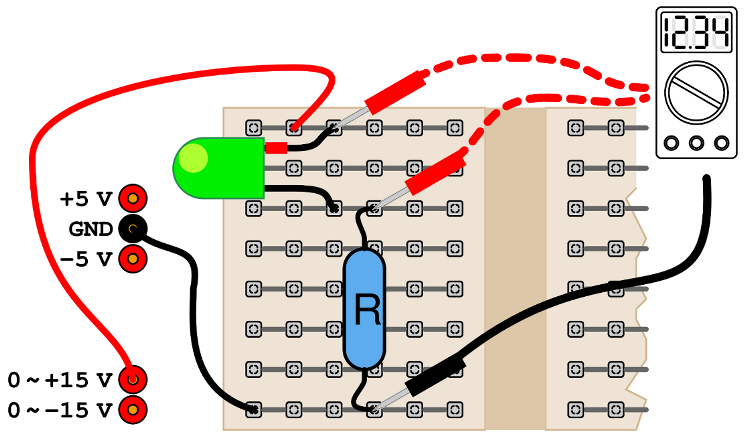

Dvs vi kan räkna ut strömmen enligt $\displaystyle I = \frac{U}{R}$. Vi beräknar även spänningen över den andra komponenten (en lysdiod) genom att subtrahera spänningen över motståndet $U_R$ från spänningen från spänningskällan $U_0$.

Våra mätpunkter ligger i numpy-listor som tillåter att vi kan räkna med hela listan åt en gång - operationen utförs dock element för element, rad för rad.

In [ ]:
I = U_R / 330

U_D = U_0 - U_R

Och nu ritar vi den motsvarande grafen med text på axlarna...

In [ ]:
fig, ax = plt.subplots()
ax.plot(U_D, I * 1000, ".", label="data")
ax.legend()
ax.set_xlabel(r"spänning över dioden $U_D/\rm{V}$")
ax.set_ylabel(r"ström genom dioden $I/\rm{mA}$")

Med lite fantasi så kan vi föreställa oss att det här skulle kunna vara en exponentiell$^\text{TM}$ funktion. För att bekräfta det så kan vi rita grafen med en logaritmisk y-axel istället:

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(U_D, I * 1000, ".", label="data")
ax.legend()
ax.set_xlabel(r"spänning över dioden $U_D/\rm{V}$")
ax.set_ylabel(r"ström genom dioden $I/\rm{mA}$")

Bilden visar en mycket rak linje som bekräftar att mätdatan förmodligen följer en exponentiell trend.

Mer om dioder efter sommaren in 1TE624 _Elektronik I_.